In [1]:
%load_ext autoreload
%autoreload 2

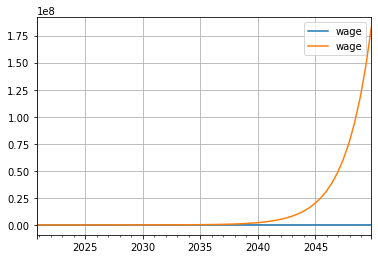

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

base = 350
values = []

for i in range(60):
    values.append(base)
    base *= 1.07

years= pd.Timestamp('2020-10-14') + pd.to_timedelta(np.arange(len(values))*180, unit='D')
ax = pd.DataFrame({"wage": values}, index=years).plot()

base = 350
values = []

for i in range(60):
    values.append(base)
    base *= 1.25

pd.DataFrame({"wage": values}, index=years).plot(ax=ax)
plt.grid()

In [3]:
source = "http://fit.cvut.cz"

In [4]:
from multiwork import get_links
from collections import deque
import random

In [5]:
visited_sites = dict()
to_visit = deque([source])

running = True
counter = 0

def filted_targets(url):
    """Restrict some servers that either cache websites, load slowly or could be misleading."""
    restricted = ["web.archive.org", "facebook.com", "youtube.com", "google.com", "apple.com"]
    for r in restricted:
        if r in url:
            return False
    return True

def traverse(url, d=0):
    """Recursively print the path between the pages."""
    if d == 0:
        print(d, url)
    prev = visited_sites.get(url)
    if prev:
        print(d+1, prev)
        traverse(prev, d+1)
    else:
        print(d+1, source)

In [195]:
while len(to_visit) and running:
    unexplored_url = to_visit.popleft().rstrip("/")
    counter += 1; print(f"{counter} ({len(to_visit)}): {unexplored_url}")
    try:
        links_from_page = get_links(unexplored_url)
    except Exception as ex:
        print(ex)
        continue
    unknown_links_from_page = links_from_page - visited_sites.keys()
    unknown_links_from_page = {x for x in unknown_links_from_page if filted_targets(x)}
    
    to_visit.extend(list(unknown_links_from_page))
    
    # Check that the target was found
    for link in unknown_links_from_page:
        visited_sites[link] = unexplored_url
        if "mit.edu" in link:
            print("Found!!!", link)
            traverse(link)
            running=False

1 (0): http://fit.cvut.cz
2 (9): https://old.fit.cvut.cz/en
3 (28): https://www.kos.cvut.cz

4 (27): https://prihlaska.cvut.cz/apps/kos/prihlaska
5 (32): http://www.portadesign.cz
6 (34): https://courses.fit.cvut.cz

7 (33): https://casopis.fit.cvut.cz
8 (76): https://is.fit.cvut.cz/group/ssp
HTTPSConnectionPool(host='idp.fit.cvut.cz', port=443): Max retries exceeded with url: /idp/profile/SAML2/Redirect/SSO?SAMLRequest=fZJRa8IwFIX%2FSsm7TexEbbCFTh8muCnW7WEvI21vZyAmXW7q5n79olXQPQghEO49597zkQmKnWp41rqtXsNXC%2BiCn53SyE%2BFhLRWcyNQItdiB8hdyfPsecGjkPHGGmdKo0iQIYJ10uip0djuwOZg97KE1%2FUiIVvnGuSUSgxr6cJy3%2Frrl%2BZbWRRGgduGiIYeXSO6WuYbEsz8GlKLo%2BGVvGpu9P5N%2FQa1VHAWr6GSFkpH83xJgvksIR8PjMWxKJiIBzUbDoZ9iEflWNRRPBxXIxb7NsQW5hqd0C4hEYtYr%2B%2FPYNOPOBtzFr%2BTYHUO%2Bih1JfXnfSpF14T8abNZ9bpAb2DxFMY3kHRyZMtPg%2B0V7fu24oKYpBciStZgxSH8B3ZCr%2Fy7YQ1%2F8Ybz2cooWR6CTCnzPbUgHCSkT2jaSW7%2FQfoH&RelayState=ss%3Amem%3A4a3d9e37967a1a777ad7e7bce371f7ef&SigAlg=http%3A%2F%2Fwww.w3.org%2F2000%2F09%2Fxmldsig%23rsa-s

110 (1064): https://aktualne.cvut.cz/aktuality/20201009-hostem-ai-science-cafe-series-2020-bude-jan-sedivy
111 (1065): https://prihlaska.cvut.cz/apps/kos/prihlaska
112 (1064): https://aktualne.cvut.cz/tiskove-zpravy
113 (1063): https://aktualne.cvut.cz/bleskove-zpravy
114 (1068): http://studyatctu.com
115 (1075): http://aktualne.cvut.cz/stalo-se
116 (1080): http://knihovna.cvut.cz/katalogy-a-databaze/prehled-databazi/zkusebni-pristup#writefull-korekce-odbornych-textu-v-anglictine
117 (1101): https://czv.cvut.cz
118 (1101): https://aktualne.cvut.cz/stalo-se/20201008-fakulta-elektrotechnicka-se-v-ramci-projektu-epirec-podili-na-vyzkumu-epilepsie
119 (1101): https://media.cvut.cz/cs/foto/20200930-studentske-formule-a-motocykly-cvut-ovladly-kampus-dejvice
120 (1100): http://akce.cvut.cz/?node=cal_item&idevent=5871&lang=cz
121 (1100): https://eobchod.cvut.cz
122 (1101): https://www.linkedin.com/school/cvutpraha

123 (1100): https://media.cvut.cz/cs/video/20201006-doc-bohata-komplexni-analyz

240 (3384): https://www.go-fair.org/2020/07/22/first-fair-data-point-for-covid-19-data-installed-in-africa
241 (3385): http://pharo.org/success/openPonk

242 (3384): https://wordpress.org
243 (3399): https://www.biohackathon-europe.org
244 (3410): http://fit.cvut.cz
245 (3409): http://wordpress.org
246 (3408): https://www.go-fair.org/implementation-networks/overview/vodan
247 (3415): https://www.caise19.it
248 (3459): https://github.com/elixir-europe/BioHackathon-projects-2020/tree/master/projects/2
249 (3458): https://www.biohackathon-europe.org/registration.html
250 (3459): https://pharo.org/GSoC19CallForStudents
251 (3469): https://ds-wizard.org
252 (3468): https://www.aaai.org/ojs/index.php/ICAPS/article/download/6677/6531

253 (3467): https://www.aaai.org/ojs/index.php/ICAPS/article/view/6677
254 (3480): https://en.gaudeamus.cz/nitra
255 (3490): https://en.gaudeamus.cz/prague/im-an-exhibitor
256 (3516): https://en.gaudeamus.cz/bratislava/im-a-teacher
257 (3516): https://en.gaudeam